In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings  #Disable the Deprecated Pandas Option 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load cleaned data
df = pd.read_csv("cleaned_customer_churn.csv")


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (if necessary)
df.dropna(inplace=True) # OR df.fillna(df.median(), inplace=True)


# Summary statistics
print(df.describe())
print(df.info())


          Latitude    Longitude  Tenure_Months  Monthly_Charges  \
count  7043.000000  7043.000000    7043.000000      7043.000000   
mean     36.282441  -119.798880      32.371149        64.761692   
std       2.455723     2.157889      24.559481        30.090047   
min      32.555828  -124.301372       0.000000        18.250000   
25%      34.030915  -121.815412       9.000000        35.500000   
50%      36.391777  -119.730885      29.000000        70.350000   
75%      38.224869  -118.043237      55.000000        89.850000   
max      41.962127  -114.192901      72.000000       118.750000   

       Total_Charges  Churn_Value  Churn_Score         CLTV  
count    7043.000000  7043.000000  7043.000000  7043.000000  
mean     2279.734304     0.265370    58.699418  4400.295755  
std      2266.794470     0.441561    21.525131  1183.057152  
min         0.000000     0.000000     5.000000  2003.000000  
25%       398.550000     0.000000    40.000000  3469.000000  
50%      1394.550000    

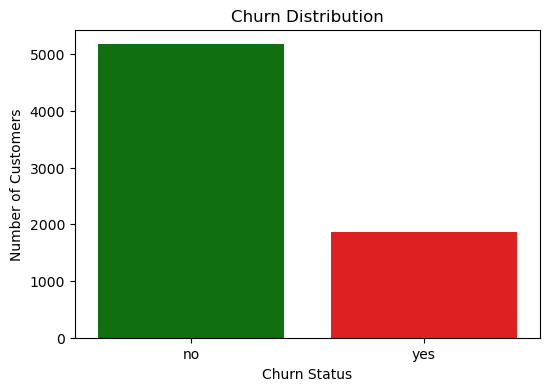

In [23]:
# Check the proportion of customers who churned vs. stayed
# Count of churned and non-churned customers
churn_counts = df['Churn_Label'].value_counts()

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["green", "red"])
plt.title("Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()
#  red- churned customer
# green - non churned customer

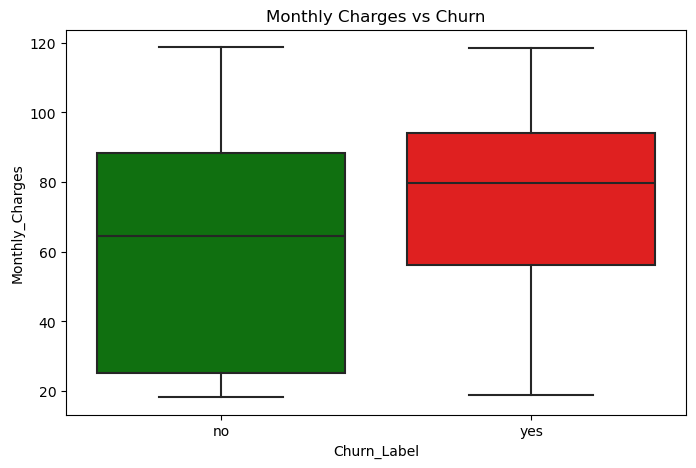

In [24]:
# Are customers with higher charges more likely to churn?
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn_Label", y="Monthly_Charges", data=df, palette=["green", "red"])
plt.title("Monthly Charges vs Churn")
plt.show()
# Higher monthly charges might lead to higher churn rates.

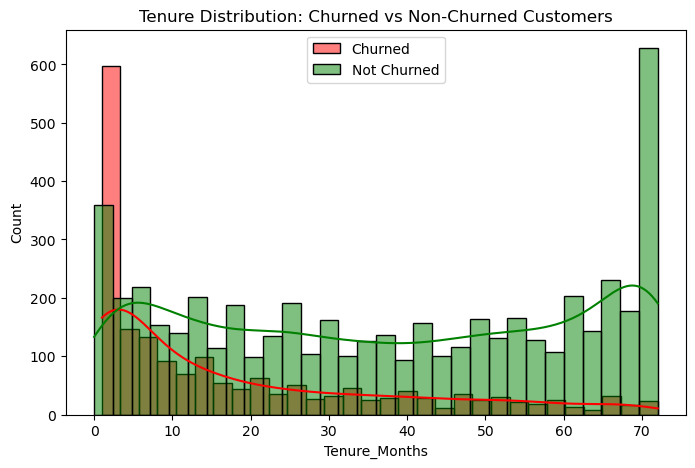

In [25]:
# Customers who leave may have short tenures.
plt.figure(figsize=(8,5))
sns.histplot(df[df["Churn_Label"] == "yes"]["Tenure_Months"], bins=30, color="red", label="Churned", kde=True)
sns.histplot(df[df["Churn_Label"] == "no"]["Tenure_Months"], bins=30, color="green", label="Not Churned", kde=True)
plt.legend()
plt.title("Tenure Distribution: Churned vs Non-Churned Customers")
plt.show()


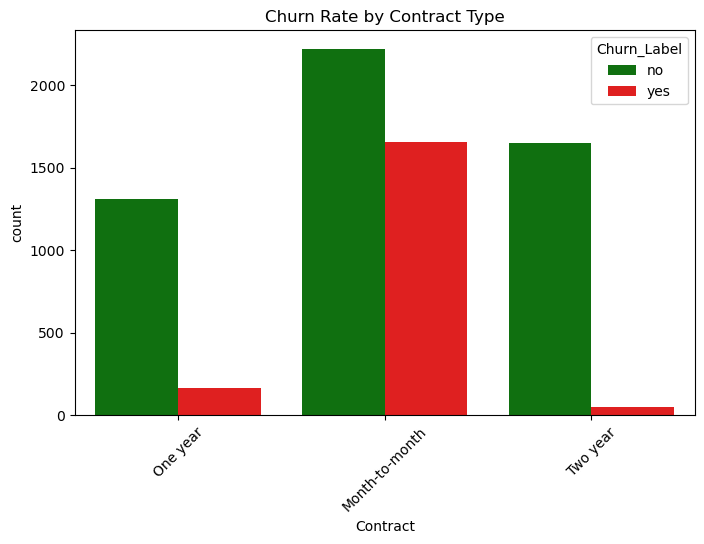

In [27]:
# Churn Rate by Contract Type
plt.figure(figsize=(8,5))Top Churn Reasons
sns.countplot(data=df, x="Contract", hue="Churn_Label", palette=["green", "red"])
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=45)
plt.show()
# Month-to-month contracts might have higher churn.

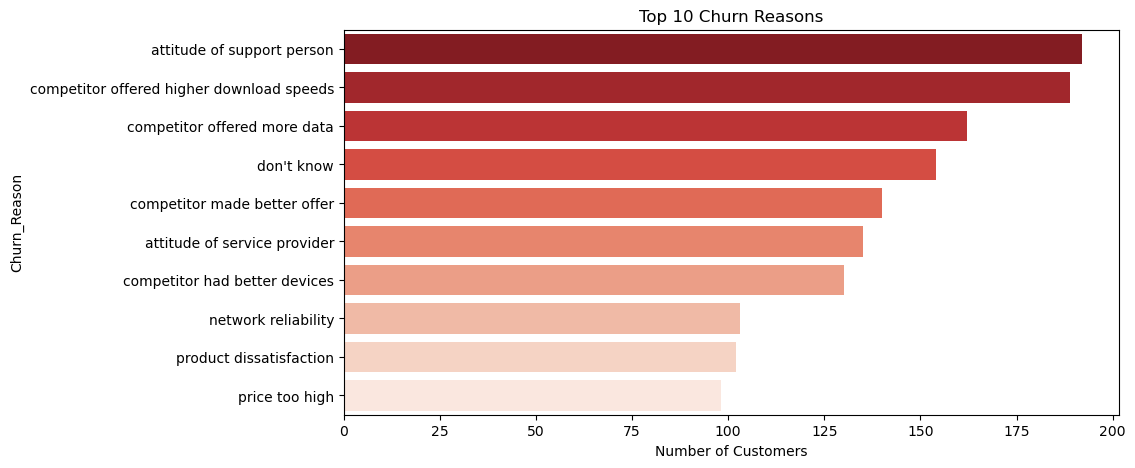

In [28]:
# Top Churn Reasons
churn_reasons = df[df["Churn_Label"] == "yes"]["Churn_Reason"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette="Reds_r")
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.show()
# This reveals why customers leave.